**Airbnb Listings and Review Analysis with Dashboard Insights**

 Load data and Handle null values

In [10]:
import pandas as pd
import numpy as np
df=pd.read_csv('listings.csv')
x=df['reviews_per_month'].mean()
df.fillna({'reviews_per_month':x},inplace=True)
y=df['price'].mean()
df.fillna({'price':y},inplace=True)
df['last_review']=pd.to_datetime(df['last_review'])
df['last_review'].fillna(pd.to_datetime('2025-05-01'), inplace=True)
print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64


/tmp/ipython-input-10-3768405724.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_review'].fillna(pd.to_datetime('2025-05-01'), inplace=True)


**explore and visualize the data using Pandas and Matplotlib**

Distribution of prices

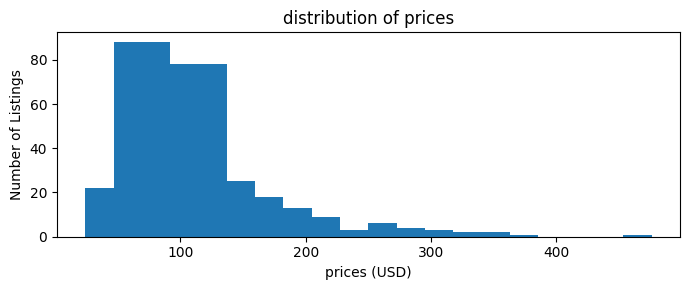

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

filter_prices=df[df['price']<500]['price']
filter_prices.plot(kind='hist',bins=20,figsize=(7,3))
plt.title('distribution of prices')
plt.xlabel('prices (USD)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.savefig('distribution of prices.png',dpi=300,bbox_inches='tight')
plt.show()




count of listing by room type

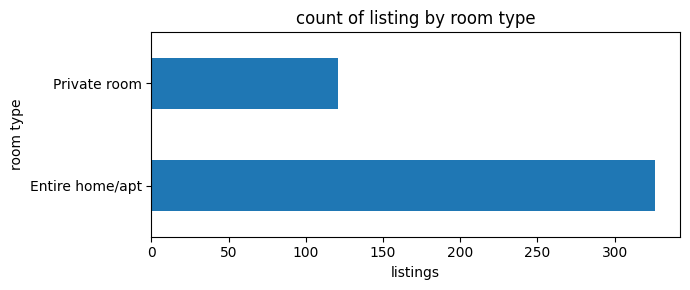

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
listings=df['room_type'].value_counts()
listings.plot(kind='barh',figsize=(7,3))
plt.title('count of listing by room type')
plt.ylabel('room type')
plt.xlabel('listings')
plt.tight_layout()
plt.savefig('listing by room type.png',dpi=300,bbox_inches='tight')
plt.show()

listing by naighborhood

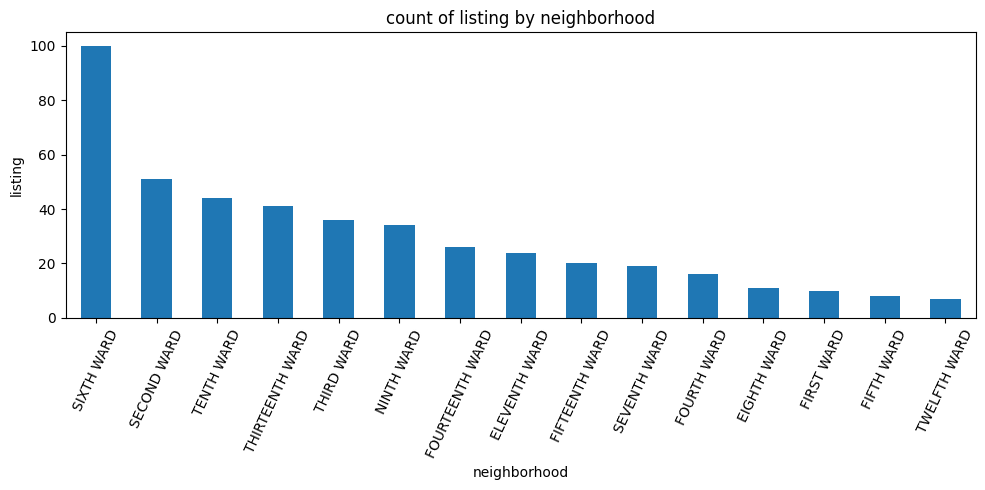

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
naighbor=df['neighbourhood'].value_counts()
naighbor.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=65)
plt.title('count of listing by neighborhood')
plt.ylabel('listing')
plt.xlabel('neighborhood')
plt.tight_layout()
plt.savefig('listing by neighborhood.png',dpi=300,bbox_inches='tight')
plt.show()

average price per neighborhood

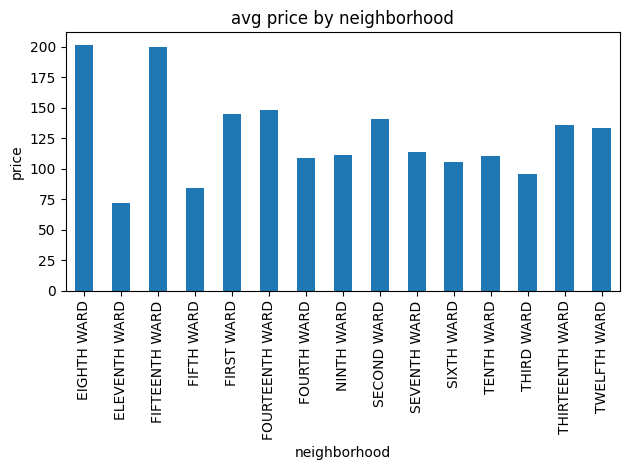

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
avgprice=df.groupby('neighbourhood')['price'].mean()
avgprice.plot(kind='bar')
plt.title('avg price by neighborhood')
plt.ylabel('price')
plt.xlabel('neighborhood')
plt.tight_layout()
plt.savefig('average price  by neighborhood.png',dpi=300,bbox_inches='tight')
plt.show()

Measure Guest Demand Over Time

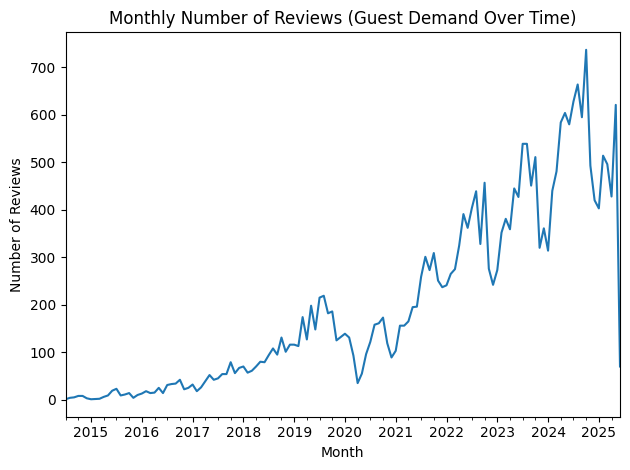

In [47]:

import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('reviews.csv')
df=df.dropna()
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].dt.to_period('M')
monthly=df.groupby('month').size()
monthly.plot(kind='line')
plt.title('Monthly Number of Reviews (Guest Demand Over Time)')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.savefig('Guest Demand Over Time.png',dpi=300,bbox_inches='tight')
plt.show()


In [51]:
import pandas as pd
df=pd.read_csv('listings.csv')


df['potential_income'] = df['price'] * df['availability_365']

df['has_recent_reviews'] = df['last_review'].notnull()
df.to_csv('cleaned_listings.csv', index=False)
